In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Set up the planet and atmosphere model.
planet=Planet("VENUS")
planet.h_skip = 180E3
planet.h_trap =  0.0E3
planet.loadAtmosphereModel('../atmdata/venus-gram-avg.dat', 0 , 1 , 2, 3)

In [4]:
speedRange = np.linspace(11, 13, 10)
gammaRange = np.linspace(-70, -10, 10)

acc_net_g_max_array       = np.zeros((len(speedRange),len(gammaRange)))
q_stag_total_max_array    = np.zeros((len(speedRange),len(gammaRange)))
heatload_max_array        = np.zeros((len(speedRange),len(gammaRange)))
dyn_pres_array            = np.zeros((len(speedRange),len(gammaRange)))
n = 0

for i, speed in enumerate(speedRange):
    for j, gamma in enumerate(gammaRange):
        vehicle=Vehicle('PVenus', 91, 190.0, 0.0, np.pi*0.76**2.0*0.25, 0.0, 0.19, planet)
        vehicle.setInitialState(180,0.0,0.0,speed,0.0,gamma,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.propogateEntry (20*60, 0.1, 0.0)
        n+=1
        print("n = " + str(n) +"G_MAX: "+str("{:.2f}".format(max(vehicle.acc_net_g)))+", Q_MAX: "+str("{:.2f}".format(max(vehicle.q_stag_total)))+", J_MAX: "+str("{:.2f}".format(max(vehicle.heatload/1.0E3)))+", P_MAX: "+str("{:.2f}".format(max(vehicle.dyn_pres_atm))))

        acc_net_g_max_array[i,j]     = max(vehicle.acc_net_g)
        q_stag_total_max_array[i,j]  = max(vehicle.q_stag_total)
        heatload_max_array[i,j]      = max(vehicle.heatload/1.0E3)
        dyn_pres_array[i,j]         = max(vehicle.dyn_pres_atm)

n = 1G_MAX: 450.08, Q_MAX: 6307.56, J_MAX: 11.79, P_MAX: 8.28
n = 2G_MAX: 428.89, Q_MAX: 6093.01, J_MAX: 11.97, P_MAX: 7.89
n = 3G_MAX: 402.05, Q_MAX: 5820.26, J_MAX: 12.23, P_MAX: 7.39
n = 4G_MAX: 370.02, Q_MAX: 5484.45, J_MAX: 12.58, P_MAX: 6.80
n = 5G_MAX: 333.46, Q_MAX: 5094.96, J_MAX: 13.06, P_MAX: 6.13
n = 6G_MAX: 290.88, Q_MAX: 4633.84, J_MAX: 13.71, P_MAX: 5.35
n = 7G_MAX: 244.60, Q_MAX: 4117.59, J_MAX: 14.63, P_MAX: 4.50
n = 8G_MAX: 193.27, Q_MAX: 3508.33, J_MAX: 16.03, P_MAX: 3.55
n = 9G_MAX: 136.62, Q_MAX: 2794.61, J_MAX: 18.50, P_MAX: 2.51
n = 10G_MAX: 66.07, Q_MAX: 1799.36, J_MAX: 25.19, P_MAX: 1.21
n = 11G_MAX: 468.14, Q_MAX: 6808.02, J_MAX: 12.71, P_MAX: 8.61
n = 12G_MAX: 446.13, Q_MAX: 6573.93, J_MAX: 12.90, P_MAX: 8.20
n = 13G_MAX: 418.41, Q_MAX: 6268.80, J_MAX: 13.17, P_MAX: 7.69
n = 14G_MAX: 385.37, Q_MAX: 5920.99, J_MAX: 13.52, P_MAX: 7.09
n = 15G_MAX: 346.76, Q_MAX: 5478.59, J_MAX: 14.00, P_MAX: 6.38
n = 16G_MAX: 302.51, Q_MAX: 4983.73, J_MAX: 14.67, P_MAX: 5.56
n 

In [5]:
from scipy import interpolate

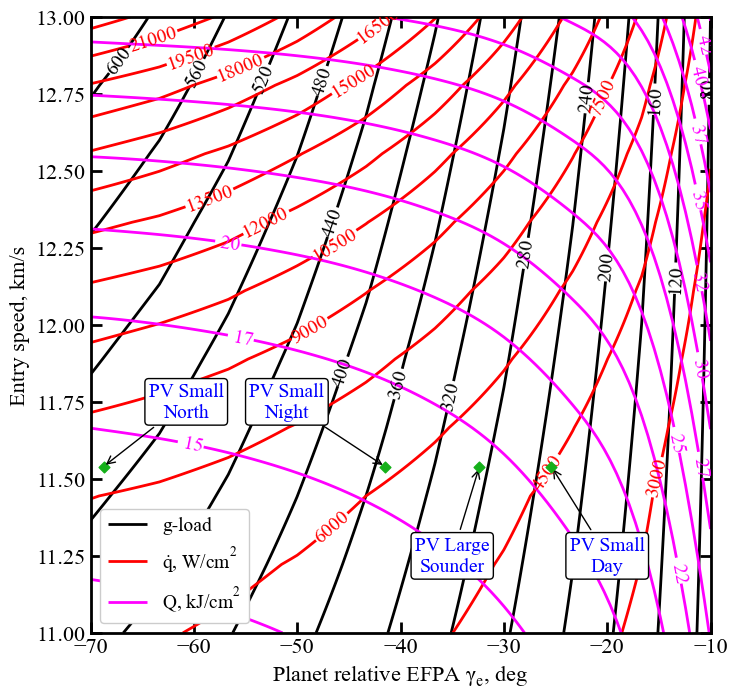

In [6]:

f1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(acc_net_g_max_array), kind='linear')
q1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(q_stag_total_max_array), kind='linear')
h1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(heatload_max_array), kind='cubic')
s1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(dyn_pres_array), kind='linear')

x_new = np.linspace(11, 13, 100)
y_new = np.linspace(-70, -10, 100)


g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        g1_new[i,j] = f1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])

X, Y = np.meshgrid(x_new, y_new)

fig = plt.figure()
fig.set_size_inches([8, 8])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

GCS1 = plt.contour(Y, X, np.transpose(g1_new), levels=15, linewidths=2.0, colors='black')
plt.clabel(GCS1, inline=1, fontsize=14, colors='black',fmt='%3d',inline_spacing=1)
#GCS1.collections[0].set_label(r'g-load')

QCS1 = plt.contour(Y, X, np.transpose(q1_new),  levels=15, linewidths=2.0, colors='red')
plt.clabel(QCS1, inline=1, fontsize=14, colors='red',fmt='%3d',inline_spacing=1)
#QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')

HCS1 = plt.contour(Y, X, np.transpose(h1_new), levels=15, linewidths=2.0, colors='magenta')
plt.clabel(HCS1, inline=1, fontsize=14, colors='magenta',fmt='%3d',inline_spacing=1)
#HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

plt.xlabel("Planet relative EFPA "+r'$\gamma_e$'+r', deg' ,fontsize=16)
plt.ylabel(r'Entry speed, km/s' ,fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')


ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)

ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')


ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

h1,l1 = GCS1.legend_elements()
h2,l1 = QCS1.legend_elements()
h3,l1 = HCS1.legend_elements()

plt.legend([h1[0], h2[0], h3[0]], ['g-load', r'$\dot{q}$'+', '+r'$W/cm^2$', r'$Q$'+', '+r'$kJ/cm^2$'], 
           fontsize=14, loc='lower left', framealpha=1.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.scatter(-68.74, 11.54, marker="D", s=30, color='xkcd:green', zorder=2)
plt.annotate("PV Small\nNorth", xy=(-68.74, 11.54), xytext=(-60.74, 11.75), va="center", ha="center",
            arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), 
            fontsize=14, color='b', bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1.0))

plt.scatter(-41.50, 11.54, marker="D", s=30, color='xkcd:green', zorder=2)
plt.annotate("PV Small\nNight", xy=(-41.50, 11.54), xytext=(-51, 11.75), va="center", ha="center",
            arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), 
            fontsize=14, color='b', bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1.0))

plt.scatter(-25.41, 11.54, marker="D", s=30, color='xkcd:green', zorder=5)
plt.annotate("PV Small\nDay", xy=(-25.41, 11.54), xytext=(-20, 11.25), va="center", ha="center",
            arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), 
            fontsize=14, color='b', bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1.0), zorder=2)

plt.scatter(-32.37, 11.54, marker="D", s=30, color='xkcd:green', zorder=5)
plt.annotate("PV Large\nSounder", xy=(-32.37, 11.54), xytext=(-35, 11.25), va="center", ha="center",
            arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), 
            fontsize=14, color='b', bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1.0), zorder=2)

plt.savefig('../plots/venus-probe-entry.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
speedRange = np.linspace(11, 13, 10)
gammaRange = np.linspace(-20, -8, 10)

acc_net_g_max_array       = np.zeros((len(speedRange),len(gammaRange)))
q_stag_total_max_array    = np.zeros((len(speedRange),len(gammaRange)))
heatload_max_array        = np.zeros((len(speedRange),len(gammaRange)))
dyn_pres_array            = np.zeros((len(speedRange),len(gammaRange)))
n = 0

for i, speed in enumerate(speedRange):
    for j, gamma in enumerate(gammaRange):
        vehicle=Vehicle('ADEPT', 50, 25.0, 0.0, np.pi*1.5**2.0*0.25, 0.0, 0.20, planet)
        vehicle.setInitialState(180,0.0,0.0,speed,0.0,gamma,0.0,0.0)
        vehicle.setSolverParams(1E-6)
        vehicle.propogateEntry (20*60, 0.1, 0.0)
        n+=1
        print("n = " + str(n) +"G_MAX: "+str("{:.2f}".format(max(vehicle.acc_net_g)))+", Q_MAX: "+str("{:.2f}".format(max(vehicle.q_stag_total)))+", J_MAX: "+str("{:.2f}".format(max(vehicle.heatload/1.0E3)))+", P_MAX: "+str("{:.2f}".format(max(vehicle.dyn_pres_atm))))

        acc_net_g_max_array[i,j]     = max(vehicle.acc_net_g)
        q_stag_total_max_array[i,j]  = max(vehicle.q_stag_total)
        heatload_max_array[i,j]      = max(vehicle.heatload/1.0E3)
        dyn_pres_array[i,j]         = max(vehicle.dyn_pres_atm)

n = 1G_MAX: 190.41, Q_MAX: 1000.24, J_MAX: 5.18, P_MAX: 0.46
n = 2G_MAX: 176.91, Q_MAX: 959.90, J_MAX: 5.37, P_MAX: 0.43
n = 3G_MAX: 162.95, Q_MAX: 917.35, J_MAX: 5.58, P_MAX: 0.39
n = 4G_MAX: 148.61, Q_MAX: 871.28, J_MAX: 5.83, P_MAX: 0.36
n = 5G_MAX: 133.91, Q_MAX: 821.78, J_MAX: 6.13, P_MAX: 0.32
n = 6G_MAX: 118.83, Q_MAX: 768.74, J_MAX: 6.49, P_MAX: 0.29
n = 7G_MAX: 102.74, Q_MAX: 709.98, J_MAX: 6.96, P_MAX: 0.25
n = 8G_MAX: 85.14, Q_MAX: 641.96, J_MAX: 7.59, P_MAX: 0.21
n = 9G_MAX: 65.84, Q_MAX: 559.56, J_MAX: 8.53, P_MAX: 0.16
n = 10G_MAX: 41.96, Q_MAX: 447.03, J_MAX: 10.35, P_MAX: 0.10
n = 11G_MAX: 197.65, Q_MAX: 1063.52, J_MAX: 5.43, P_MAX: 0.48
n = 12G_MAX: 183.56, Q_MAX: 1020.65, J_MAX: 5.62, P_MAX: 0.44
n = 13G_MAX: 169.07, Q_MAX: 974.78, J_MAX: 5.85, P_MAX: 0.41
n = 14G_MAX: 154.02, Q_MAX: 925.36, J_MAX: 6.11, P_MAX: 0.37
n = 15G_MAX: 138.71, Q_MAX: 872.25, J_MAX: 6.42, P_MAX: 0.34
n = 16G_MAX: 122.91, Q_MAX: 815.12, J_MAX: 6.80, P_MAX: 0.30
n = 17G_MAX: 106.04, Q_MAX: 751.

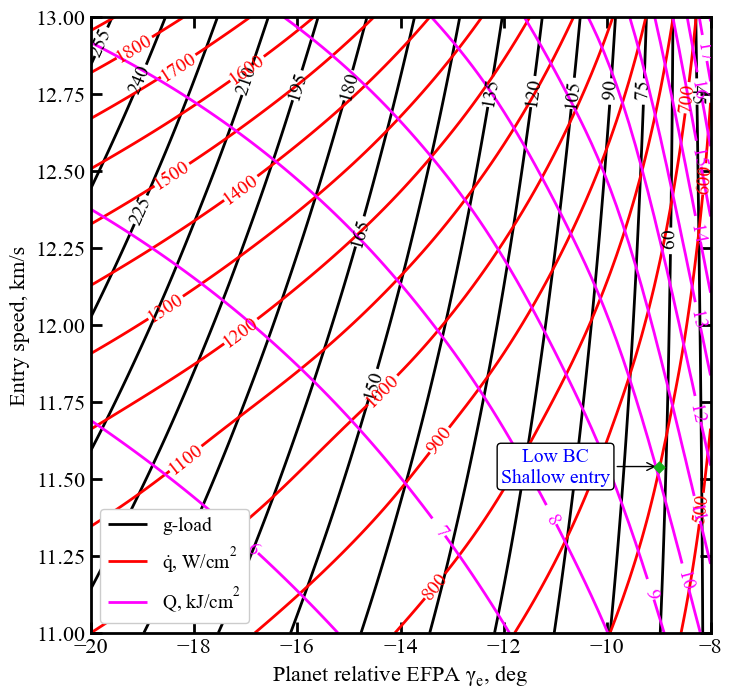

In [11]:
f1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(acc_net_g_max_array), kind='cubic')
q1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(q_stag_total_max_array), kind='cubic')
h1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(heatload_max_array), kind='cubic')
s1 = interpolate.interp2d(speedRange, gammaRange, np.transpose(dyn_pres_array), kind='cubic')

x_new = np.linspace(11, 13, 100)
y_new = np.linspace(-20, -8, 100)


g1_new =  np.zeros((len(x_new),len(y_new)))
q1_new =  np.zeros((len(x_new),len(y_new)))
h1_new =  np.zeros((len(x_new),len(y_new)))
s1_new =  np.zeros((len(x_new),len(y_new)))

for i in range(0,len(x_new)):
    for j in range(0,len(y_new)):

        g1_new[i,j] = f1(x_new[i],y_new[j])
        q1_new[i,j] = q1(x_new[i],y_new[j])
        h1_new[i,j] = h1(x_new[i],y_new[j])
        s1_new[i,j] = s1(x_new[i],y_new[j])

X, Y = np.meshgrid(x_new, y_new)

fig = plt.figure()
fig.set_size_inches([8.00,8.00])
plt.ion()
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

GCS1 = plt.contour(Y, X, np.transpose(g1_new), levels=15, linewidths=2.0, colors='black')
plt.clabel(GCS1, inline=1, fontsize=14, colors='black',fmt='%3d',inline_spacing=1)
#GCS1.collections[0].set_label(r'g-load')

QCS1 = plt.contour(Y, X, np.transpose(q1_new),  levels=15, linewidths=2.0, colors='red')
plt.clabel(QCS1, inline=1, fontsize=14, colors='red',fmt='%3d',inline_spacing=1)
#QCS1.collections[0].set_label(r'$\dot{q}$'+', '+r'$W/cm^2$')

HCS1 = plt.contour(Y, X, np.transpose(h1_new), levels=15, linewidths=2.0, colors='magenta')
plt.clabel(HCS1, inline=1, fontsize=14, colors='magenta',fmt='%3d',inline_spacing=1)
#HCS1.collections[0].set_label(r'$Q$'+', '+r'$kJ/cm^2$')

plt.xlabel("Planet relative EFPA "+r'$\gamma_e$'+r', deg' ,fontsize=16)
plt.ylabel(r'Entry speed, km/s' ,fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')


ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)

ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')


ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

h1,l1 = GCS1.legend_elements()
h2,l1 = QCS1.legend_elements()
h3,l1 = HCS1.legend_elements()

plt.legend([h1[0], h2[0], h3[0]], ['g-load', r'$\dot{q}$'+', '+r'$W/cm^2$', r'$Q$'+', '+r'$kJ/cm^2$'], 
           fontsize=14, loc='lower left', framealpha=1)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)

plt.scatter(-9, 11.54, marker="D", s=30, color='xkcd:green', zorder=5)
plt.annotate("Low BC\nShallow entry", xy=(-9, 11.54), xytext=(-11, 11.54), va="center", ha="center",
            arrowprops=dict(arrowstyle='->, head_width=0.2', facecolor='blue'), 
            fontsize=14, color='b', bbox=dict(boxstyle='round,pad=0.2', fc='w', ec='k', alpha=1.0), zorder=2)

plt.savefig('../plots/venus-low-bc.png', dpi=300, bbox_inches='tight')
plt.show()